In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # for visualisation of data

In [2]:
#2
file_path = "C:\\Users\\User\\Desktop\\datasets\\starbucks.csv"
starbucks = pd.read_csv(file_path)

In [4]:
#3
print("First 10 entries of 'starbucks':\n", starbucks.head(10))

First 10 entries of 'starbucks':
          Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   
5  Classic Espresso Drinks    Caffè Latte            2% Milk       100   
6  Classic Espresso Drinks    Caffè Latte            Soymilk        70   
7  Classic Espresso Drinks    Caffè Latte   Tall Nonfat Milk       100   
8  Classic Espresso Drinks    Caffè Latte            2% Milk       150   
9  Classic Espresso Drinks    Caffè Latte            Soymilk       110   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            

In [5]:
#4
total_entries = starbucks.shape[0]
print("\nTotal number of entries in 'starbucks':", total_entries)


Total number of entries in 'starbucks': 242


In [6]:
#5
print("\nColumn names in 'starbucks':\n", starbucks.columns)


Column names in 'starbucks':
 Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


In [7]:
#6
print("\nIndexing of 'starbucks':")
print(starbucks.index)


Indexing of 'starbucks':
RangeIndex(start=0, stop=242, step=1)


In [9]:
#7
max_sugar_drink = starbucks.groupby('Beverage_category')[' Sugars (g)'].mean().idxmax()
print("\nThe drink category with the most amount of sugar on average:", max_sugar_drink)


The drink category with the most amount of sugar on average: Frappuccino® Blended Coffee


In [12]:
#8
num_categories = starbucks['Beverage_category'].nunique()
print("\nNumber of different drink categories:", num_categories)


Number of different drink categories: 9


In [13]:
#9
top_categories = starbucks['Beverage_category'].value_counts().head(5).index.tolist()
print("\nThe 5 most frequent drink categories:", top_categories)


The 5 most frequent drink categories: ['Classic Espresso Drinks', 'Tazo® Tea Drinks', 'Signature Espresso Drinks', 'Frappuccino® Blended Coffee', 'Shaken Iced Beverages']


In [16]:
#10
avg_calories_per_category = starbucks.groupby('Beverage_category')['Calories'].mean()
print("\nAverage calorie content per drink category:")
print(avg_calories_per_category)


Average calorie content per drink category:
Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64


In [22]:
#11

#first
starbucks['Caffeine (mg)'] = pd.to_numeric(starbucks['Caffeine (mg)'], errors='coerce')
starbucks['Calories'] = pd.to_numeric(starbucks['Calories'], errors='coerce')

#answer
starbucks['caffeine_to_calories'] = starbucks['Caffeine (mg)'] / starbucks['Calories']
print(starbucks['caffeine_to_calories'])

0      58.333333
1      65.000000
2      66.000000
3      82.000000
4       1.071429
         ...    
237     0.000000
238     0.000000
239     0.000000
240     0.000000
241     0.000000
Name: caffeine_to_calories, Length: 242, dtype: float64


In [23]:
max_caffeine_to_calories_category = starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean().idxmax()
print("\nThe drink category with the highest 'caffeine_to_calories' ratio on average:", max_caffeine_to_calories_category)


The drink category with the highest 'caffeine_to_calories' ratio on average: Coffee


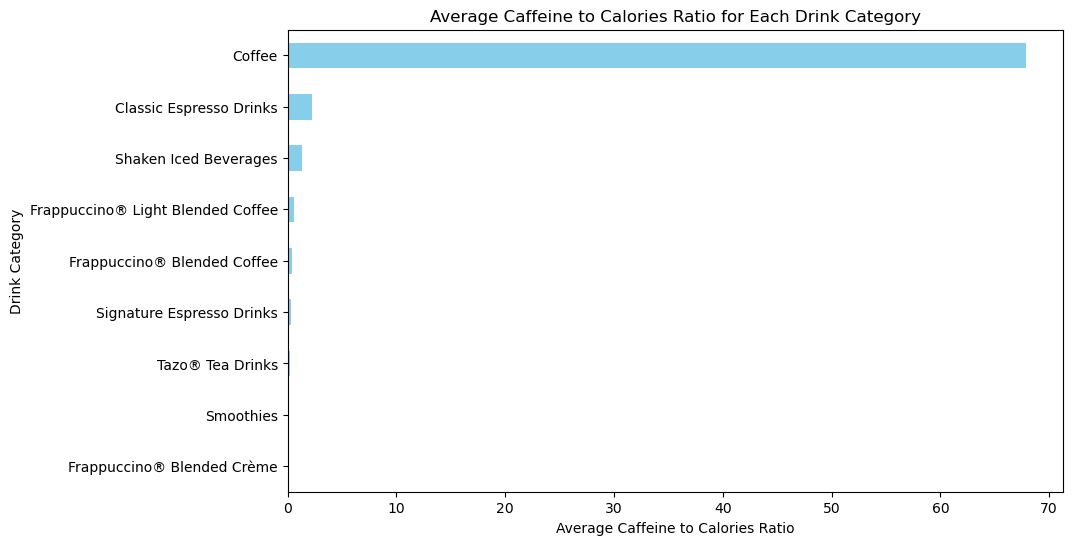

In [24]:
plt.figure(figsize=(10, 6))
starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Average Caffeine to Calories Ratio')
plt.ylabel('Drink Category')
plt.title('Average Caffeine to Calories Ratio for Each Drink Category')
plt.show()

In [27]:
#What is the relationship between sugar and caffeine across different drink categories?”

correlation_sugar_caffeine = starbucks[' Sugars (g)'].corr(starbucks['Caffeine (mg)'])
print("\nCorrelation between ' Sugars (g)' and ' Caffeine (mg)':", correlation_sugar_caffeine)


Correlation between ' Sugars (g)' and ' Caffeine (mg)': -0.0965997570625648
